In [ ]:
import numpy as np
from numpy.linalg import norm
import pickle
import matplotlib
import matplotlib.pyplot as plt
import itertools
from scipy.stats import norm as norm_d
from scipy.stats import expon
from scipy.stats import weibull_min as weibull
from scipy.stats import burr12 as burr
from scipy.stats import randint
from scipy.stats import uniform
from scipy.optimize import minimize
import copy
import math
import time
from scipy.optimize import minimize
from scipy.sparse.linalg import svds
from scipy.linalg import svdvals
import scipy
from sklearn.datasets import load_svmlight_file
import pickle
from pathlib import Path
from functions import *
#from algorithms import *
from utils import *
#from tests import *

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

%matplotlib inline

# Logistic regression

## australian

In [ ]:
%%time
dataset = "australian"
A, y, m, n, sparsity_A = prepare_data(dataset)
print("Number of functions: ", m, ", dimension: ", n)
L, average_L, worst_L = compute_L(dataset, A)
denseA = A.toarray()
print("Smoothness const: ", L)
print("Average smoothness const: ", average_L)
print("Worst smoothness const: ", worst_L)
print("Percentage of non-zeros: ", sparsity_A)

Number of functions:  690 , dimension:  14
Smoothness const:  7036285.411416828
Average smoothness const:  7051931.8309915885
Worst smoothness const:  2500100840.3125
Percentage of non-zeros:  0.7995859213250518
CPU times: user 13.7 ms, sys: 753 µs, total: 14.5 ms
Wall time: 17.8 ms


### Find the solution (Run this code only once)

In [ ]:
filename=dataset+"_x_init_all_ones"
x_init = np.ones(n)
l2 = 0
l1 = 0

In [ ]:
%%time
param = [A, y, l2, False, l1]
res_solver = minimize(F, x_init, args = param, jac=logreg_grad_plus_lasso,
                      method='L-BFGS-B',
                      options={'maxiter':10000, 'disp':True}, tol=1e-18)

print(res_solver.success)
print(res_solver.fun)
print(res_solver)

True
0.3333040480827712
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 0.3333040480827712
        x: [-4.015e-01 -1.369e-02 ... -2.284e-03  5.186e-04]
      nit: 2073
      jac: [-2.207e-07  8.237e-07 ...  8.014e-06  1.721e-05]
     nfev: 2411
     njev: 2411
 hess_inv: <14x14 LbfgsInvHessProduct with dtype=float64>
CPU times: user 1.21 s, sys: 36.2 ms, total: 1.25 s
Wall time: 1.28 s


In [ ]:
save_solution(dataset, l2, l1, np.array(res_solver.x), res_solver.fun)

### Noise distribution

In [ ]:
x_star = read_solution(dataset, l2, l1)[0]
f_star = read_solution(dataset, l2, l1)[1]

In [ ]:
from copy import deepcopy


In [ ]:
%%time
x = deepcopy(x_star)
grad_deviations = np.array([])
full_grad = logreg_grad(x, [denseA,y,0,False])
for i in range(m):
    grad_deviations = np.append(grad_deviations, np.linalg.norm(logreg_grad(x, [denseA[[i]],y[[i]],0,False]) - full_grad))

CPU times: user 55.2 ms, sys: 33.9 ms, total: 89.1 ms
Wall time: 52.2 ms


In [ ]:
np.sort(grad_deviations)

array([1.90018038e-05, 1.90214210e-05, 1.91200667e-05, 8.94012767e-04,
       2.01090929e-03, 2.00537286e-02, 4.02819430e-02, 4.74022649e-02,
       7.51024378e-01, 8.28032272e-01, 9.32545847e-01, 1.01572126e+00,
       1.03823272e+00, 1.17930506e+00, 1.33134641e+00, 1.52204139e+00,
       1.68280612e+00, 1.77151823e+00, 1.84238588e+00, 1.86280535e+00,
       1.88581325e+00, 1.94106088e+00, 1.95016686e+00, 1.96328661e+00,
       2.05856139e+00, 2.11103439e+00, 2.13866094e+00, 2.21054596e+00,
       2.23067524e+00, 2.26601111e+00, 2.35894932e+00, 2.49109167e+00,
       2.51188589e+00, 2.54995847e+00, 2.60954765e+00, 2.66234625e+00,
       2.66277636e+00, 2.68032467e+00, 2.70075673e+00, 2.71887255e+00,
       2.84733508e+00, 2.84986037e+00, 2.85137755e+00, 2.87707672e+00,
       2.87886188e+00, 2.91616122e+00, 3.00509707e+00, 3.02152358e+00,
       3.04240530e+00, 3.04962722e+00, 3.06710427e+00, 3.12237851e+00,
       3.23698320e+00, 3.27209521e+00, 3.27671972e+00, 3.28291999e+00,
      

In [ ]:
mu = np.mean(grad_deviations)
sigma = np.sqrt(np.mean(grad_deviations**2 - mu))
print(mu)
print(sigma)

82.70080089491833
232.11797590970988


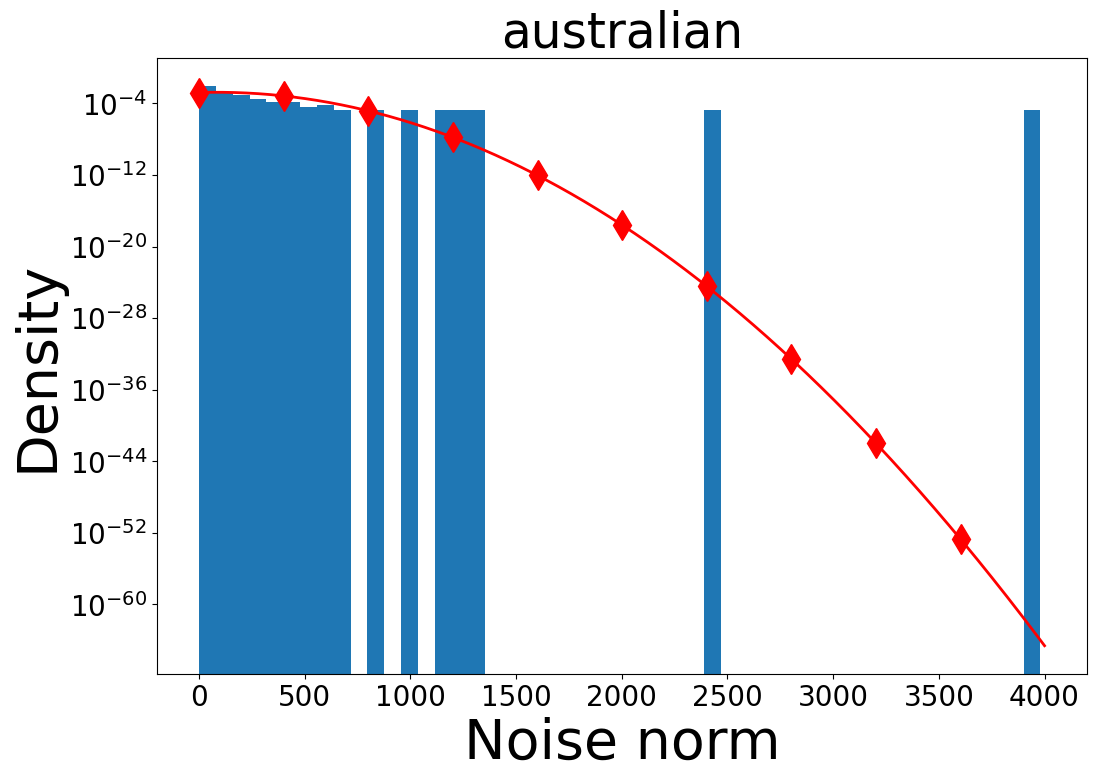

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
t, bins, patches = plt.hist(np.sort(grad_deviations), bins=50, density=1, log=True)
temp2 = np.linspace(0, 4000, 1000)
plt.semilogy(temp2, norm_d.pdf(temp2, mu, sigma), linewidth=2, color='red', marker='d',
            markersize = 15,
            markevery=range(0, 1000, 100))
plt.title('australian', fontsize=35)
plt.xlabel("Noise norm", fontsize=40)
plt.ylabel("Density", fontsize=40)
plt.savefig("plot/australian_real.pdf", bbox_inches='tight')

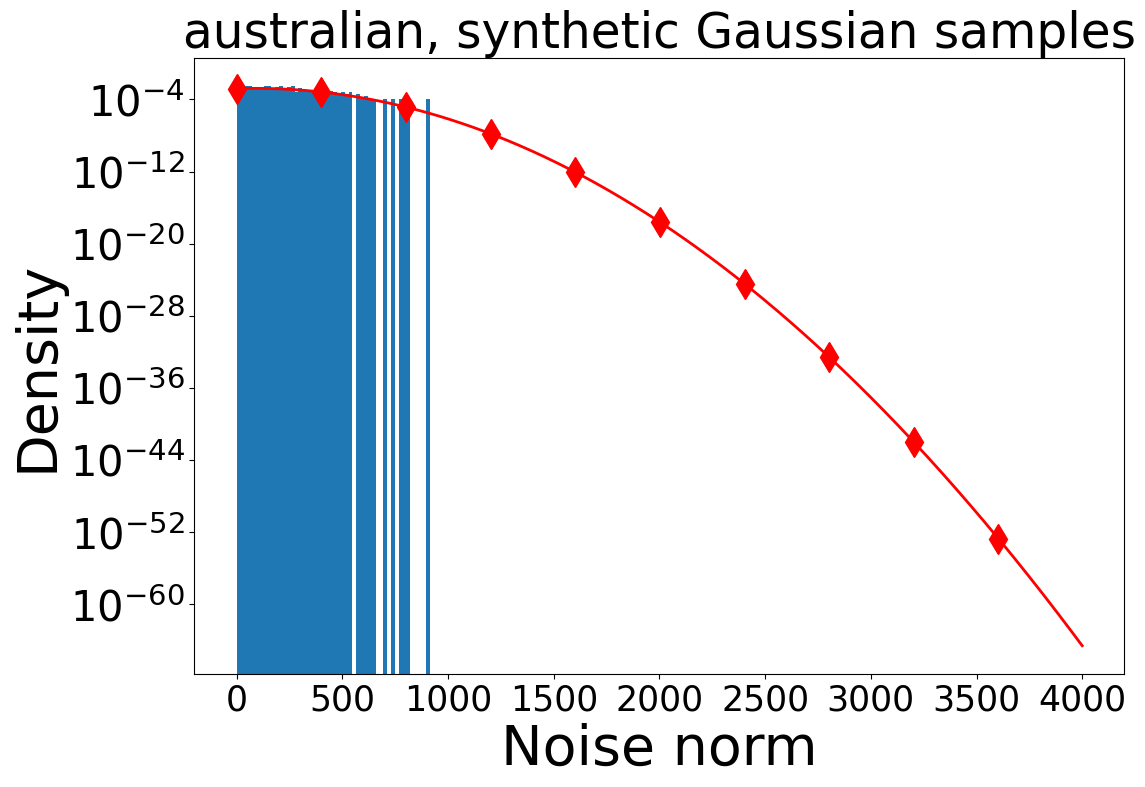

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize=25)
plt.yticks(fontsize=30)
sample = norm_d.rvs(loc=mu, scale=sigma, size=m)
sample = sample[sample > 0]
t, bins, patches = plt.hist(sample, bins=50, density=(1 - norm_d.cdf(0,loc=mu,scale=sigma)), log=True)
temp2 = np.linspace(0, 4000, 1000)
plt.semilogy(temp2, norm_d.pdf(temp2, mu, sigma), linewidth=2, color='red', marker='d',
            markersize = 15,
            markevery=range(0, 1000, 100))
plt.title('australian, synthetic Gaussian samples', fontsize=35)
plt.xlabel("Noise norm", fontsize=40)
plt.ylabel("Density", fontsize=40)
plt.savefig("plot/australian_synthetic.pdf", bbox_inches='tight')

### Tests

In [ ]:
shift_param = 0.1
filename=dataset+"_x_star_shifted_by_all_ones_shift_"+str(shift_param)
l2 = 0
l1 = 0
batch_size = 50
M = int(2*m/batch_size)
gamma = 1.0/(L+l2)
x_star = read_solution(dataset, l2, l1)[0]
f_star = read_solution(dataset, l2, l1)[1]
x_init = x_star + shift_param*np.ones(n)
lambd = 2*np.sqrt(2)*(L+l2)*norm(x_star-x_init)*0.0000025
lambd_schedule = [lambd, 1000, 0.9]
S = 50000
save_info_period = 100
beta = 0.001
N = int(S*m/batch_size)
a = ((np.log(4*N/beta)) ** 2)
print("a = ", a)

B = norm(x_star-x_init) / (np.log(4*N/beta))
print("B = ", B)

sparse_full = False
sparse_stoch = False

In [ ]:
print("gamma = ", gamma)

In [ ]:
print("Initial value: ", logreg_loss(x_init, [denseA,y,l2,False,0]))

In [ ]:
print(lambd)

### SSTM

In [ ]:
%%time

res = clipped_sstm(filename=filename, x_init=x_init, A=A, y=y, a=a_tun_const,
             B=B*B_tun_const, L=L+l2, l2=l2,
             sparse_full=sparse_full, sparse_stoch=sparse_stoch,
             S=S, max_t=np.inf,
             batch_size=batch_size, indices=None, save_info_period=save_info_period,
             x_star=x_star, f_star=f_star)

### SGD and clipped-SGD

In [ ]:
%%time
lambd_schedule = [2*np.sqrt(2)*(L+l2)*norm(x_star-x_init)*0.00001, 1500, 0.9]
res = clipped_sgd_const_stepsize_decr_clip(filename=filename, x_init=x_init, A=A, y=y, gamma=gamma,
     lambd_schedule=lambd_schedule, l2=l2,
     sparse_full=sparse_full, sparse_stoch=sparse_stoch,
     l1=l1, S=S, max_t=np.inf,
     batch_size=batch_size, indices=None, save_info_period=save_info_period,
     x_star=x_star, f_star=f_star)
print("Value: ", res['func_vals'][-1]+f_star)

In [ ]:
%%time
res = clipped_sgd_const_stepsize(filename=filename, x_init=x_init, A=A, y=y, gamma=gamma,
     lambd=lambd, l2=l2,
     sparse_full=sparse_full, sparse_stoch=sparse_stoch,
     l1=l1, S=S, max_t=np.inf,
     batch_size=batch_size, indices=None, save_info_period=save_info_period,
     x_star=x_star, f_star=f_star)
print("Value: ", res['func_vals'][-1]+f_star)

In [ ]:
%%time
res = sgd_const_stepsize(filename=filename, x_init=x_init, A=A, y=y, gamma=gamma,
     l2=l2,
     sparse_full=sparse_full, sparse_stoch=sparse_stoch,
     l1=l1, S=S, max_t=np.inf,
     batch_size=batch_size, indices=None, save_info_period=save_info_period,
     x_star=x_star, f_star=f_star)
print("Value: ", res['func_vals'][-1]+f_star)

In [ ]:
print(lambd_schedule[0])

In [ ]:
methods = [
         ['SGD_const_stepsize', [gamma, l2, l1, S, batch_size],
           'SGD', None],
         ['clipped-SGD_const_stepsize', [gamma, lambd, l2, l1, S, batch_size],
           'clipped-SGD', None],
         ['clipped-SGD_const_stepsize_decr_clip', [gamma,
                                                   lambd_schedule,
                                                   l2, l1, S, batch_size],
           'd-clipped-SGD', None],
           ['clipped-SSTM', [1000.0, B*0.01, L+l2, l2, S, batch_size],
           'clipped-SSTM', None],
        ['SSTM', [1000.0, L+l2, l2, S, batch_size],
           'SSTM', None],
]
mode_y = 'func_vals'
mode_x = 'data_passes'
figsize = (12, 8)
title_size = 30
linewidth = 2
markersize = 15
legend_size = 25
xlabel_size = 30
ylabel_size = 40
xticks_size = 20
yticks_size = 30
sizes = [title_size, linewidth, markersize, legend_size, xlabel_size, ylabel_size, xticks_size, yticks_size]
title = dataset
bbox_to_anchor = (1,1)
legend_loc="upper right"


save_fig = [True, filename+"_test_test.pdf"]

args_for_plots = [filename, mode_y, mode_x, figsize, sizes, title, methods, bbox_to_anchor, legend_loc, save_fig]
make_plots(args_for_plots)

In [ ]:
res = read_results_from_file(filename, 'SGD_const_stepsize', [gamma, l2, l1, S, batch_size])

In [ ]:
%%time
x = deepcopy(res['last_iter'])
grad_deviations = np.array([])
full_grad = logreg_grad(x, [denseA,y,0,False])
for i in range(m):
    grad_deviations = np.append(grad_deviations, np.linalg.norm(logreg_grad(x, [denseA[[i]],y[[i]],0,False]) - full_grad))

In [ ]:
print(norm(full_grad))

In [ ]:
mu = np.mean(grad_deviations)
sigma = np.sqrt(np.mean(grad_deviations**2 - mu))
print(mu)
print(sigma)

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
t, bins, patches = plt.hist(np.sort(grad_deviations), bins=50, density=1, log=True)
temp2 = np.linspace(0, 4500, 1000)
plt.semilogy(temp2, norm_d.pdf(temp2, mu, sigma), linewidth=2, color='red', marker='d',
            markersize = 15,
            markevery=range(0, 1000, 100))
plt.title('australian, real samples', fontsize=35)
plt.xlabel("Noise norm", fontsize=40)
plt.ylabel("Density", fontsize=40)
plt.savefig("plot/australian_sgd_last_point_big_step.pdf", bbox_inches='tight')

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
sample = norm_d.rvs(loc=mu, scale=sigma, size=m)
sample = sample[sample > 0]
t, bins, patches = plt.hist(sample, bins=50, density=(1 - norm_d.cdf(0,loc=mu,scale=sigma)), log=True)
temp2 = np.linspace(0, 4500, 1000)
plt.semilogy(temp2, norm_d.pdf(temp2, mu, sigma), linewidth=2, color='red', marker='d',
            markersize = 15,
            markevery=range(0, 1000, 100))
plt.title('australian, synthetic Gaussian samples', fontsize=35)
plt.xlabel("Noise norm", fontsize=40)
plt.ylabel("Density", fontsize=40)
plt.savefig("plot/australian_synthetic_sgd_last_iter_big_step.pdf", bbox_inches='tight')

In [ ]:
res = read_results_from_file(filename, 'SGD_const_stepsize', [1.0/(L+l2), l2, l1, S, batch_size])

In [ ]:
%%time
x = deepcopy(res['last_iter'])
grad_deviations = np.array([])
full_grad = logreg_grad(x, [denseA,y,0,False])
for i in range(m):
    grad_deviations = np.append(grad_deviations, np.linalg.norm(logreg_grad(x, [denseA[[i]],y[[i]],0,False]) - full_grad))

In [ ]:
print(norm(full_grad))

In [ ]:
mu = np.mean(grad_deviations)
sigma = np.sqrt(np.mean(grad_deviations**2 - mu))
print(mu)
print(sigma)

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
t, bins, patches = plt.hist(np.sort(grad_deviations), bins=50, density=1, log=True)
temp2 = np.linspace(0, 5000, 1000)
plt.semilogy(temp2, norm_d.pdf(temp2, mu, sigma), linewidth=2, color='red', marker='d',
            markersize = 15,
            markevery=range(0, 1000, 100))
plt.title('australian, real samples', fontsize=35)
plt.xlabel("Noise norm", fontsize=40)
plt.ylabel("Density", fontsize=40)
plt.savefig("plot/australian_sgd_last_point_small_step.pdf", bbox_inches='tight')

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
sample = norm_d.rvs(loc=mu, scale=sigma, size=m)
sample = sample[sample > 0]
t, bins, patches = plt.hist(sample, bins=50, density=(1 - norm_d.cdf(0,loc=mu,scale=sigma)), log=True)
# t, bins, patches = plt.hist(np.where(sample>0, sample, 0), bins=50, density=1, log=True)
temp2 = np.linspace(0, 5000, 1000)
# plt.plot(temp2, norm_d.pdf(temp2, mu, sigma))
plt.semilogy(temp2, norm_d.pdf(temp2, mu, sigma), linewidth=2, color='red', marker='d',
            markersize = 15,
            markevery=range(0, 1000, 100))
plt.title('australian, synthetic Gaussian samples', fontsize=35)
plt.xlabel("Noise norm", fontsize=40)
plt.ylabel("Density", fontsize=40)
plt.savefig("plot/australian_synthetic_sgd_last_iter_small_step.pdf", bbox_inches='tight')